Now, we’ve seen just how powerful Quantum Computing is, with the **Deutsch-Jozsa** Algorithm’s incredible **O(1)** run-time complexity.

However, Deutsch-Jozsa doesn’t really do a lot. In fact, the problem seems awfully specific, as if crafted to play to Quantum Computers’ strengths. 

Not that this makes the algorithm ‘bad’ per se — it still shows the incredible potential of Quantum Computing — but still, let’s look at a more general, albeit complex version. One that solves a much more difficult problem with a still-amazing speedup. One that could even potentially have real-world applications in cryptography. **Bernstein-Vazirani Algorithm**.

# Introduction :

## Bernstein-Vazirani Problem :

Consider the example of Quantum Game show which we have considered for explaining Deutsch-Jozsa Algorithm.

Here also, for Bernstein-Vazirani we are modelling our algorithm as a oracle and rules of the problem can be interpreted as host laying out the rules of Quantum Game.

***In Deutsch-Jozsa :***
```text
Host : "Here is a list of numbers. 
        You can choose any of them and hand it to me. 
        In return i will tell you '0' or '1'."
```

Now the Bernstein-Vazirani is similar to this Deutsch-Jozsa but there is a twist.

***In Bernstein-Vazirani :***
```text
Host : "I am thinking of one, very specific number in a list which is given to you.
        You also need to select a number and give it to me.
        I will tell you inner product of your number and mine with modulo 2.
        It will be '0' or '1'.
        You have to guess exact number I'm thinking of to win. 
        There is only one right answer, out of all possible numbers.
        Which number am I thinking of? Can you guess it?"
```

## Classical Algorithm :

The number which we are guessing from a list of numbers is our Query from a particular input domain.

Here, the host can be considered as a **Black-box Oracle**. Hosts holds a hidden bit string( number we need to guess) and uses it in their operation.

Host takes our input and his hidden value and performs inner product of those two numbers and and also performs modulo 2. This should either give **'0'** or **'1'** as the result of operation.

### What is inner product ?

- Inner products are just like dot products — except they continue the same process for more than just 2 numbers.

- In short, we take a single element from both vectors, and multiply them. Take the next two elements, multiply them, and add the result to the previous number. Take the next two, multiply, and add to the running total, and so on.

Now how inner product is related to our situation!!!. Generally inner product involves two vectors, and here we are discussing about two numbers.

Let's say from Host(oracle's) perspective those two number are binary strings.

- Let the hidden bit string is **'01101'** and our selection (query) is **'10101'**.

- So how do we map these to vectors? Quite simply, all we have to do is take each binary digit as an element, and write the vectors out.

- We can’t take the inner product of two row vectors, though — as explained in the last link, we’ll need take the transpose of the first vector. Just change it from a column to a row vector, and keep everything else the same.

$${\begin{bmatrix}0\\1\\1\\0\\1\end{bmatrix}}^T\cdot\begin{bmatrix}1\\0\\1\\0\\1\end{bmatrix} = \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}1\\0\\1\\0\\1\end{bmatrix}$$

- Then multiply each element, and add to get a result of 2.

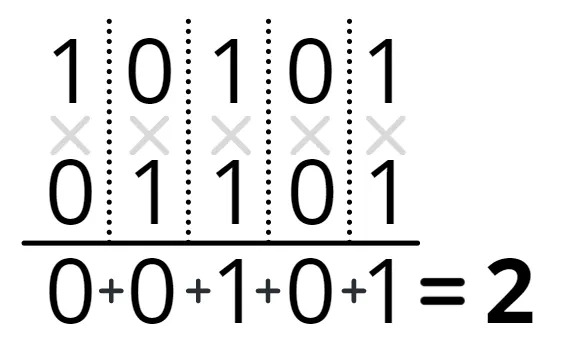

Interestingly, only **(1x1)** will ever return **1** in the multiplication stage; all other combinations return **0**. 

This matches up with the Truth Table for the **Classical AND Gate**, meaning this can be exactly represented by AND Gates. It’s nothing essential to the process, but an intriguing idea nonetheless.

Now perform modulo operation by **2** to the result of Inner product.

### What is Modulo Operation?

Now what’s a modulo operation? It’s remarkably simple — just a remainder.

For example :
$$10-Modulo(5) = \frac{10}{5} \implies\ result\ = 2\ and\ remainder\ = 0\$$

$$Module(5) = 0$$

Dividing 10 by 3, for example, goes 3 times with a remainder of 1. So, 10 mod(3) = 1. Easy as that.

- So we have got value of inner product as 2. and we need to perform modulus with 2.

- This gives $2mod(2) = 0$, so our Oracle would output zero.

If, our input had been something like **‘01000’**, it would have output **‘1’**.

## Classical Solution :

Now let us viualize above algorithm in simple block diagram.

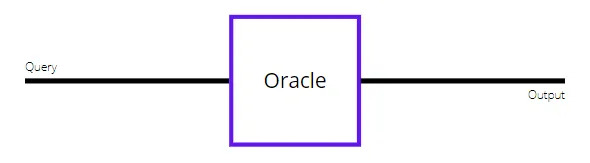

```text
The query is our guess and output is '0' or '1'
```

Now, we only get a single bit of Output to work with. Logically, this means each time we query the Oracle, we can get a single bit of information at most about the hidden bit string.

Because of this, we want to avoid wasting any of those bits, and get rid of any ambiguity. We need an input which can, with 100% certainty, determine one bit of the answer.

Consider the Query **'01000'**. Why does it output **1**?

- Because the **‘1’** in the Query matched up with a **‘1’** in the answer, we got an output of **1 mod(2) = 1**.

- Every other Query bit was **0**, and so would have simply added **0** to the answer — so this could not have been **3 mod(2)**.

- If we had gotten a **0** as output, then we know our **‘1’** didn’t match up with a **‘1’** in the hidden bit string. There must have been a **zero** in that spot.

- So, we know for sure that we have a **‘1’** in the answer, in the second position.

The Classical Algorithm simply repeats this process for every bit! For a string of length 5, like our example, that means **‘10000’, ‘01000’, ‘00100’, ‘00010’,** and **‘00001’**.

At that point, we are guaranteed to know the answer — the number of Queries equals the length of the list. Thinking back to Big-O Notation, that’s **O(n)** time, and won’t scale very well for massive lists.